# Section 2:  Guide to Loading and Manipulating the Coadded Maps.  

This Section will cover how to read in and manipulate the large coadded maps presented in [Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf), covering close to half the sky in temperature and polarization. These maps are released with DR4 as season 2008 - 16 maps and then DR5 includes updated coadded maps with data from season 2008 - 18.
We ask that when using this data product you reference the original work ([Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf)).

Notebook Info | Value
---|---
Dependencies | `numpy`, `scipy`, `healpy`, `matplotlib`, `pixell`
Data products | "act_planck_dr4.01_s08s16_AA_f150_night_map_dg_I.fits"
 | "act_planck_dr4.01_s08s16_AA_f150_night_map_d56_I.fits"
Optional Data Products | "act_planck_dr4.01_s08s16_AA_f150_night_map.fits"
Memory usage | Minimal unless using the optional full resolution and area map
Contributors | Maya Mallaby-Kay, Zach Atkins


To return to navigate between sections, use the links in the table of contents.

## Table of contents

 --- 
> [Section 1](Section_1_Introduction.ipynb): Overview and Introduction

> [Section 2](Section_2_coadded_maps.ipynb): Coadded maps from [Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf) and an Introduction to Pixell

> [Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to convert maps between HEALPix format and the CAR format.

> [Section 4](Section_4_visualize_objects.ipynb):  The DR5 Cluster Catalog from [Hilton et al (2020)](https://arxiv.org/abs/2009.11043) and Visualizing Objects in the Maps

> [Section 5](Section_5_Lensing_maps.ipynb):  Introduction to the Lensing maps from [Darwish et al (2020)](https://arxiv.org/pdf/2004.01139.pdf)

> [Section 6](Section_6_Component_separated_maps.ipynb):  Guide to the use of the Component Separated maps from [Madhavacheril et al (2019)](https://arxiv.org/abs/1911.05717)

> [Section 7](Section_7_power_spectra_part_1.ipynb): Power Spectra Part 1 - Harmonic Analysis using CAR maps [Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf)

> [Section 8](Section_8_power_spectra_part_2.ipynb) Power Spectra Part 2 - Power Spectrum example using Nawrapper [Aiola et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_A20.pdf) and [Choi et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_C20.pdf) 

> [Section 9](Section_9_Noise_sims.ipynb): Generating Noise Simulations 

> [Section 10](Section_10_E_B_maps.ipynb):  Look at how to generate E and B maps from I, Q, U maps. 

> [Section 11](Section_11_ACT_likelihood.ipynb): Using the ACT Likelihood code

> [Section 12](Section_12_delensing_param_shifts.ipynb):  Delensing the CMB powerspectrum and comparing the delensed and lensed parameters from [Han et al. (2020)](https://arxiv.org/pdf/2007.14405.pdf)
 
---

This section will walk users through using Pixell to access maps.  The demonstration is done using the 150 GHz ACT + Planck S08-16 coadded maps discussed in [Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf).  The other coadded maps provided are listed in Table 2.  Substituting these file names allows you to switch between frequencies, maps built with and without Planck data, and the coadded map used in this example.

These coadded maps cover an area of $0^o < RA < 360^o$, $-62^o < Dec < 22^o$, corresponding to an area of 26.4 thousand square degrees, of which about 70% is exposed.

There are two versions of these maps that are available, the DR4 version which includes data from S08-S16 and then the updated, deeper, version from DR5 which includes data from S08-S18. Note that while these maps can be used for a range of analyses, we do not provide a noise model or the splits (as is the case with the raw maps, see [Aiola et al](https://phy-act1.princeton.edu/public/saiola/act_dr4_A20.pdf)) that would be needed to use these maps in cosmological analysis. We will distribute polarization maps including splits with which the noise can be evaluated in a future release.  In the present form, one can use these coadded maps for studies of foregrounds, the galaxy, and (with proper care) point source properties.


Finally, for each frequency, we provide both temperature and polarization maps.  The polarization angle has been calibrated, but the polarization leakage of the beam has not been corrected.  Because these maps are produced by combining observations from multiple seasons and arrays, as well as from both ACT and Planck, the data are easier to use and understand than the individual season or array maps used to create them.   We also provide source free maps for which we've removed point sources, in this case galaxies and clusters, as well as maps with those same galaxies and clusters left in.


The maps shown here, as well as the full coadded maps, are explained in greater detail in [Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf)


 ---
Table 2: Coadded S08-S16 Maps**
---


 Map File Name | Key Details
 :--|:--
  act_dr4.01_s08s16_AA_f090_night_map_srcfree.fits | 98 GHz ACT only, source free maps,  units of $\mu$K  
  act_dr4.01_s08s16_AA_f090_night_map.fits   | 98 GHz ACT only, point sources included, units of $\mu$K 
  act_dr4.01_s08s16_AA_f090_night_ivar.fits | 98 GHz ACT only, inverse variance (similar to hit count maps) units of $1/ \mu K^2$
  |
  act_dr4.01_s08s16_AA_f150_night_map_srcfree.fits | 150 GHz ACT only, source free maps,  units of $\mu$K  
  act_dr4.01_s08s16_AA_f150_night_map.fits   | 150 GHz ACT only, point sources included, units of $\mu$K
  act_dr4.01_s08s16_AA_f150_night_ivar.fits  | 150 GHz ACT only, inverse variance (similar to hit count maps) units of $1/ \mu K^2$ 
   |
  **ACT + Planck Maps**|
   act_planck_dr4.01_s08s16_AA_f090_night_map_srcfree.fits | 98 GHz  ACT + Planck combined, source free maps,  units of $\mu$K  
  act_planck_dr4.01_s08s16_AA_f090_night_map.fits | 98 GHz ACT + Planck combined, point sources included, units of $\mu$K 
  act_planck_dr4.01_s08s16_AA_f090_night_ivar.fits | 98 GHz  ACT + Planck combined, inverse variance (similar to hit count maps) units of $1/ \mu K^2$ 
  |
   act_planck_dr4.01_s08s16_AA_f150_night_map_srcfree.fits | 150 GHz  ACT + Planck combined, source free maps,  units of $\mu$K 
  act_planck_dr4.01_s08s16_AA_f150_night_map.fits  | 150 GHz  ACT + Planck combined, point sources included, units of $\mu$K 
  act_planck_dr4.01_s08s16_AA_f150_night_ivar.fits  | 150 GHz  ACT + Planck combined, inverse variance (similar to hit count maps) units of $1/ \mu K^2$ 
  |

---

** The DR5 versions follow the same naming scheme but with "dr5" instead of "dr4"

## Initialize notebook

We begin by importing Pixell and other neccesary functions by running the introductory notebook.

In [2]:
%run Section_1_Introduction.ipynb

## Reading in the maps

We will demonstrate how to read in CAR maps and examine them using various Pixell based tools.

In this example in particular, we will work with the 150 GHz intensity map. In general, however, the map products package I, Q and U maps together in a single Pixell `ndmap` object, indexed in that order along the first object axis: note the `[0]` after the read_map command in "Option 2" below. Once downloaded from [LAMBDA](https://lambda.gsfc.nasa.gov/product/act/), you can read the various maps described in Table 2 using the same command.

Due to the large size of these maps, we offer users two options for exploration in these notebooks:  

>1) You can read in the full sky-area, downgraded intensity map, along with a full resolution cutout of the sky.  Between the two maps you'll be able to see the scope of our data as well as the depth.

>2) Alternatively, if you have space and resources for the full file, but don't want to read the whole map into the notebook, we demonstrate how to read in just a small area of the full, higher-resolution map.

You can of course choose to read in the full map in its entirety as well but that may be difficult on some computers.

In [5]:
#Comment this block and run the next one if you are using the full maps

#Option 1: Read in the downgraded map and the full-res cutout

imap_dg = enmap.read_map(path + "act_planck_dr4.01_s08s16_AA_f150_night_map_dg_I.fits")

imap_d56 = enmap.read_map(path + "act_planck_dr4.01_s08s16_AA_f150_night_map_d56_I.fits")

This second box is commented out currently, but if you have the full maps downloaded then feel free to read that in instead of the maps in the cell above.

One thing worth looking at here is that the `[0]` in `imap = enmap.read_map(path + "act_planck_dr4.01_s08s16_AA_f150_night_map.fits",   box = box)[0]` is there because the map contains the temperature map and then the Q and U maps and (for now) we only want to read in the first component which is the temperature map.

In [ ]:
# # Uncomment this block to use the full map

# # Option 2: Read in a subset of the full map

# # Set the size of the box in degrees and convert to radians
# dec_from, dec_to = np.deg2rad([-30,5])
# ra_from, ra_to = np.deg2rad([-10, 50])

# # Create the box
# box = [[dec_from,ra_from],[dec_to,ra_to]]

# # read in the map
# imap = enmap.read_map(path + "act_planck_dr4.01_s08s16_AA_f150_night_map.fits", box = box)[0]

The map is stored as an [ndmap](https://pixell.readthedocs.io/en/latest/usage.html#the-ndmap-object) object, which combines a numpy array with a "world coordinate system" (WCS) object describing the relation between pixel space and the celestial sphere. In order to examine the WCS and shape of the map, simply call the instance variables as shown here.

In [4]:
# We check which version of the maps we have read in so that later on we can use the right ones
try:
    imap_dg
except NameError:
    imap_dg = None

try:
    imap_d56
except NameError:
    imap_d56 = None

In [5]:
# Now we can print off the wcs and shape information for our maps
if imap_dg is not None:
    print(imap_dg.shape)
    print(imap_dg.wcs)

else:
    print(imap.shape)
    print(imap.wcs)

(2580, 10800)
car:{cdelt:[-0.03333,0.03333],crval:[0,0],crpix:[5401,1891]}


The WCS object includes important information that Pixell uses to handle the maps.  The first item is the projection which for this map is 'car'.  While Pixell can handle other projections, the most recent ACT maps are all in CAR, or Plate Carée, format.  This means that the sky can be directly mapped on to the pixels using the simple relations:
$$\phi  = x, \quad \theta = y$$ 

Where $\phi$ is the Right Ascension and $\theta$ is declination.

For more information on WCS objects consider referencing the [astropy wcs documentation](http://docs.astropy.org/en/stable/wcs/index.html) . 

## Visualizing the maps

The module `pixell.enplot` has built-in tools that allow you to easily plot maps; a full list can be found in the Pixell code available on Github.

Here we provide several examples of these features including downgrading (which is done internally through pixel averaging), adjusting the frequency of the ticks on the axes, and displaying a color bar. 

Some other useful keywords that are used later in this notebook are:

*   "upgrade" - useful for plotting small stamps around point sources
*   "min", "max", and "range" - set the color range for the colorbar
*   "color" - set the color map for the maps (e.g. planck, wmap, hotcold, etc.)





In [7]:
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

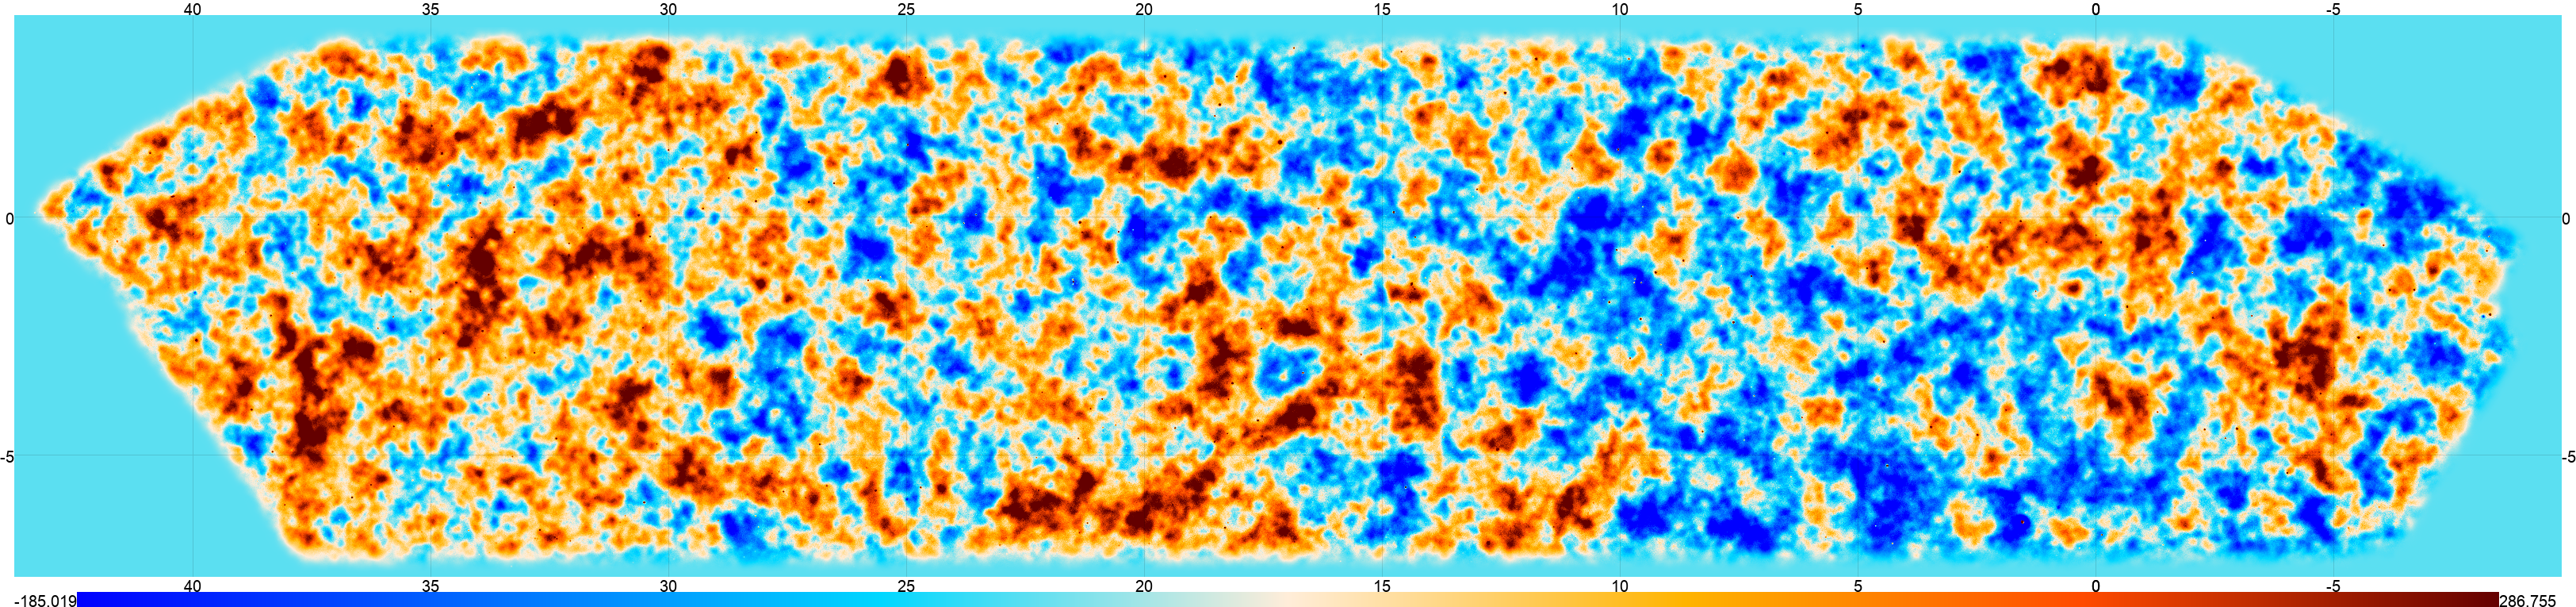

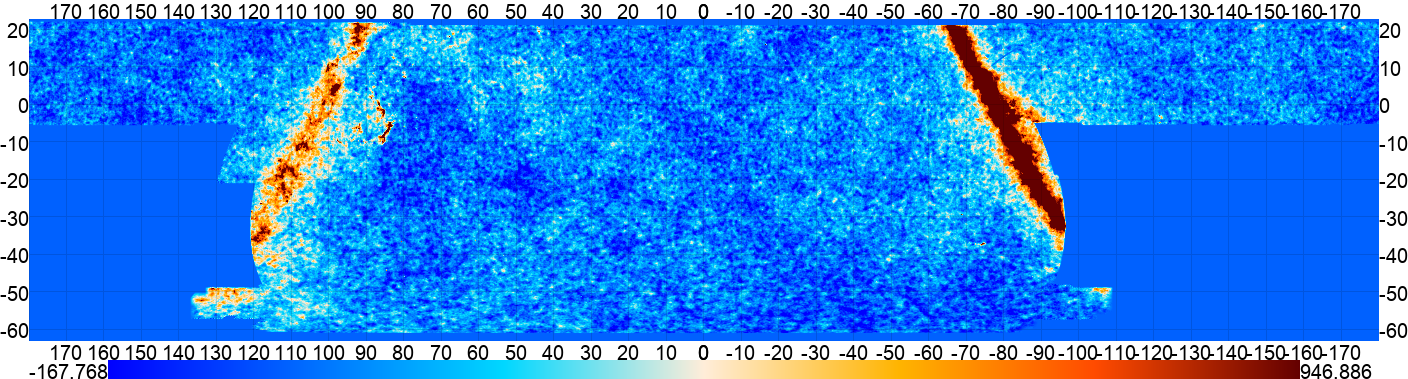

In [7]:
# add "color", "min", "max", "range" etc keys here to adjust your plot
keys = {"downgrade": 8, "ticks": 10, "colorbar": True}  
keys_d56 = {"downgrade": 2, "ticks": 5, "colorbar": True}  

if imap_dg is not None:
    eshow(imap_d56, **keys_d56)
    eshow(imap_dg, **keys)
else:
    eshow(imap, **keys) 

### Selecting a smaller patch of the sky

One of the advantages of using the CAR basis with Pixell is that you can easily select a small region of the map to examine in more detail.  Users can select a "submap" by creating a bounding box around a central location in RA and DEC.  For example, if we wanted to visualize an object at RA = 0 and dec = 0  we can create a box, with a width of $W$ degrees, around this location.  Note that Pixell assumes units of radians so here we convert the dec, ra, and width to radians using numpy before forming the box.

You can also create a box using the framework:

> box = [[dec_from, ra_from],[dec_to, ra_to]] $\quad$ (in radians)

 

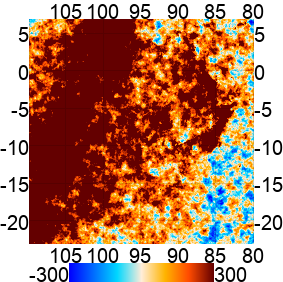

In [10]:
# Set up a box around dec = -8 and ra = 95
dec,ra = np.deg2rad([-8,95]) 

# Give the box a width of 30 degrees
W = 30
width = np.deg2rad(W)

# Create the box and use it to select a submap
box = [[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]]

# Because the original cutout of the full map that we read in doesn't include this particular box you can read it in again at this location
# or use the downgraded

# ~~~~ Downgraded option ~~~~
if imap_dg is not None:
    smap = imap_dg.submap(box)

# ~~~~ Full map (higher res) option ~~~~
else:
    smap = enmap.read_fits(path + "act_planck_dr4.01_s08s16_AA_f150_night_map.fits", box = box)[0]

    

# Plot the map using the eshow function we defined earlier 
eshow(smap, **{"colorbar":True, "range": 300, "ticks": 5, "downgrade": 4})


The map above is showing our galaxy, as well as some of the diffuse structure around it!

### Selecting a patch using pixel-indexing
Alternatively we can slice the map using numpy array indexing to get a submap.  This will select a submap using the indeces of the pixels themselves instead of sky coordinates.  We will do that now for a larger area.  

What's especially useful about this technique is that Pixell will automatically handle fixing the map projections as needed by adjusting the wcs information stored within the sliced map.  If you look at the two wcs objects printed after the map you can see the resolution is constant, but the center pixel adjusted when we sliced the map.

Later on in these notebooks we will use this method to look at galaxy clusters and Messier objects.

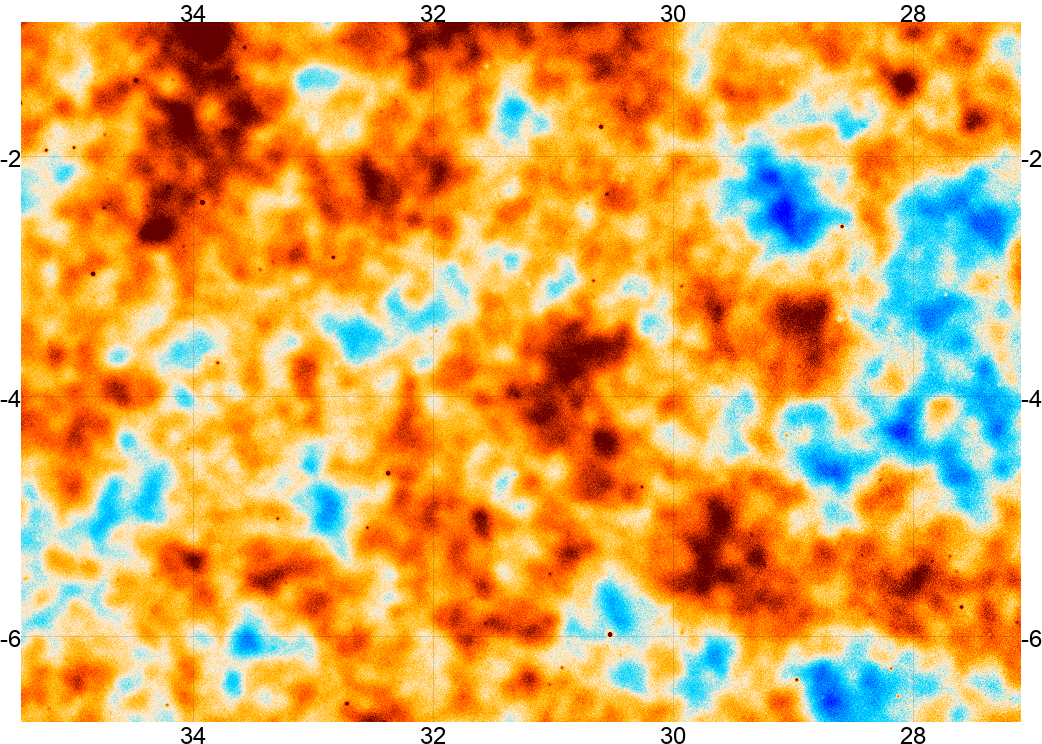

In [12]:
# We choose slightly different slices depending on the map you're using but in both cases we use classic numpy array slicing to look at a patch of the map
if imap_d56 is not None:
    smap_2 = imap_d56[100:800, 1000: 2000]
else:
    smap_2 = imap[3000:4000,2000:4000]

eshow(smap_2, **{ "ticks": 2, "range": 300, "font_size":24})


### Continue to the next section

[Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to converted maps between HEALPix format and the CAR format.
